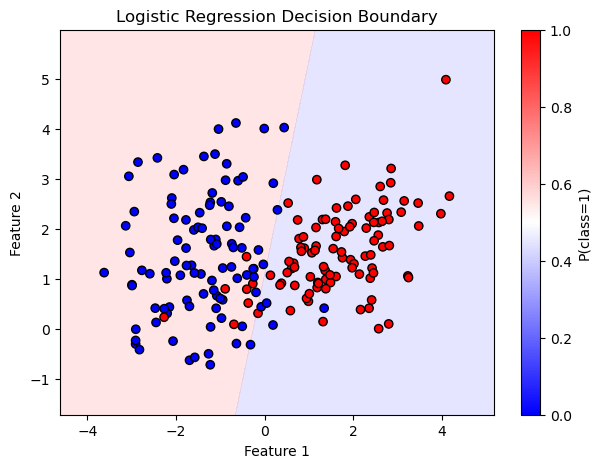

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

# 1️⃣ Generate a simple 2D dataset
X, y = make_classification(
    n_samples=200,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    class_sep=1.5,
    random_state=42
)

# 2️⃣ Train logistic regression
model = LogisticRegression()
model.fit(X, y)

# 3️⃣ Create a mesh grid for visualization
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# 4️⃣ Predict probabilities on the grid
Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

# 5️⃣ Plot decision boundary and points
plt.figure(figsize=(7, 5))
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.3, colors=["#FFAAAA", "#AAAAFF"])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, edgecolor='k')
plt.title("Logistic Regression Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="P(class=1)")
plt.show()